## Visualization

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, auc
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler 

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

from warnings import filterwarnings
filterwarnings('ignore')

In [20]:
df = pd.read_csv("cleaned_data.csv")

data = pd.read_csv("data.csv")

#### country data

In [14]:
country_data = pd.DataFrame(data.loc[data["is_canceled"] == 1]["country"].value_counts())

country_data.rename(columns={"country": "Number of Guests"}, inplace=True)
total_guests = country_data["Number of Guests"].sum()
country_data["Guests in %"] = round(country_data["Number of Guests"] / total_guests * 100, 2)
country_data["country"] = country_data.index

In [15]:
country_data_percent = country_data.copy()
country_data_percent.loc[country_data["Guests in %"] < 2, "country"] = "Other"

In [16]:
country_data_percent

,Number of Guests,Guests in %,country
PRT,27240,62.10,PRT
GBR,2453,5.59,GBR
ESP,2168,4.94,ESP
FRA,1934,4.41,FRA
ITA,1333,3.04,ITA
...,...,...,...
UMI,1,0.00,Other
HND,1,0.00,Other
FJI,1,0.00,Other
SYC,1,0.00,Other


In [17]:
import plotly.express as px

# pie plot
fig = px.pie(country_data_percent,
             values="Number of Guests",
             names="country",
             title="Home country of guests",
             
             template="seaborn")
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

#### plot the map

In [18]:
guest_map = px.choropleth(country_data,
                          locations = country_data.index,
                          color = country_data["Guests in %"], 
                          hover_name=country_data.index, 
                          color_continuous_scale = [(0,"yellow"), (0.01, "orange"), (1, "red")], 
                          title="Home country of guests")
guest_map.update_layout(title_text='Home country of guests', title_x=0.5)
guest_map.show()

In [8]:
country_data[country_data.index == "ATA"] ## 2 guests come from ATA...

,Number of Guests,Guests in %,country
ATA,2,0.0,ATA


In [19]:
country_data2 = pd.DataFrame(data.loc[data["is_canceled"] == 1]["country"].value_counts())

country_data2.rename(columns={"country": "Number of Guests"}, inplace=True)
total_guests = country_data2["Number of Guests"].sum()
country_data2["Guests in %"] = round(country_data2["Number of Guests"] / total_guests * 100, 2)
country_data2["country"] = country_data2.index

# country_data_percent = country_data2.copy()
# country_data_percent.loc[country_data["Guests in %"] < 2, "country"] = "Other"

guest_map_2 = px.choropleth(country_data2,
                          locations = country_data2.index,
                          color = country_data2["Guests in %"], 
                          hover_name=country_data2.index, 
                          color_continuous_scale = [(0,"yellow"), (0.01, "orange"), (1, "red")], 
                          title="Home country of guests")
guest_map_2.update_layout(title_text='Home country of guests', title_x=0.5)
guest_map_2.show()

In [10]:
country_data2

,Number of Guests,Guests in %,country
PRT,27240,62.10,PRT
GBR,2453,5.59,GBR
ESP,2168,4.94,ESP
FRA,1934,4.41,FRA
ITA,1333,3.04,ITA
...,...,...,...
UMI,1,0.00,UMI
HND,1,0.00,HND
FJI,1,0.00,FJI
SYC,1,0.00,SYC


In [11]:
cancel_rate = []
for i in range(127):
    temp = country_data_total.iloc[country_data_total.index == country_data2.iloc[i]['country']]['country']
    cancel_rate.append(country_data2.iloc[i]['Number of Guests']/temp)

NameError: name 'country_data_total' is not defined

In [ ]:
country_data2['Cancel Rate'] = cancel_rate

In [ ]:
plt.plot(country_data2['country'], country_data2['Cancel Rate'])

In [ ]:
country_data_total

In [ ]:
country_data2

In [ ]:
df

## Logistic Regression

In [ ]:
df.shape

In [21]:
## room_type_change = []
##for i in range(len(df)):
##    if df['assigned_room_type'].iloc[i] == df['reserved_room_type'].iloc[i]:
##        room_type_change.append(0)
##    else:
##        room_type_change.append(1)

##df['room_type_change'] = room_type_change

X = pd.concat([df.iloc[:,0], df.iloc[:, 2:23]], axis = 1)
# X = df[['hotel', 'lead_time', 'adr', 'total_of_special_requests', 'required_car_parking_spaces',
#         'customer_type', 'days_in_waiting_list', 'booking_changes', 'room_type_change']]

y = df[['is_canceled']]

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 208)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR = LogisticRegression(C = 3.5)
LR.fit(X_train, y_train)
y_predict_LR = LR.predict(X_test)
cm_LR = confusion_matrix(y_test, y_predict_LR)
cm_LR, np.sum(np.diagonal(cm_LR))/ np.sum(cm_LR)

(array([[12275,  2633],
        [ 4960,  3776]]),
 0.6788614447639993)

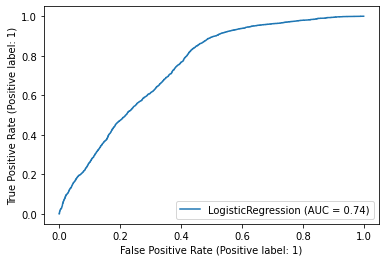

In [15]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(LR, X_test, y_test)

In [16]:
y_prob_LR = LR.predict_proba(X_test)

## K-NN

In [17]:
from sklearn.neighbors import KNeighborsClassifier

KN = KNeighborsClassifier()
parameters_KN = {'n_neighbors':[100, 500, 1000]}
clf_KN = GridSearchCV(KN, parameters_KN)
clf_KN.fit(X_train, y_train)
y_predict_KN = clf_KN.predict(X_test)
cm_KN = confusion_matrix(y_test, y_predict_KN)
cm_KN, np.sum(np.diagonal(cm_KN))/ np.sum(cm_KN), clf_KN.best_estimator_


(array([[14322,   586],
        [  790,  7946]]),
 0.9418034173574691,
 KNeighborsClassifier(n_neighbors=100))

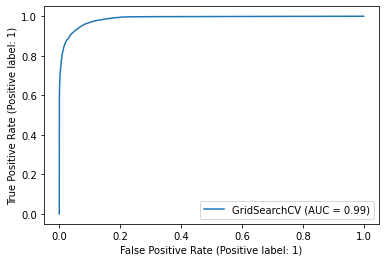

In [18]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(clf_KN, X_test, y_test)

In [19]:
y_prob_KN = clf_KN.predict_proba(X_test)

## SVM

In [20]:
from sklearn.svm import SVC

SVM = SVC(probability=True)
SVM.fit(X_train, y_train)
y_predict_SVM = SVM.predict(X_test)
cm_SVM = confusion_matrix(y_test, y_predict_SVM)
cm_SVM, np.sum(np.diagonal(cm_SVM))/ np.sum(cm_SVM)

(array([[13380,  1528],
        [ 1324,  7412]]),
 0.8793774319066148)

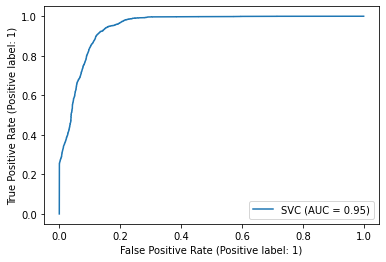

In [21]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(SVM, X_test, y_test)

In [22]:
y_prob_SVM = SVM.predict_proba(X_test)

## ROC Comparison

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
# Construct Grid Parameters
dt_params = {
    'max_depth':[None],
    'max_features' : np.linspace(0,1,11),
    'min_samples_split': range(20,30), 
    'min_samples_leaf': range(1,5)
}

# Perform Grid Search
dt_gs = GridSearchCV(DecisionTreeClassifier(random_state=42),
                 dt_params,
                 cv = 5,
                 scoring = 'accuracy')
dt = dt_gs.fit(X_train, y_train)
y_prob_DT = dt_gs.predict_proba(X_test)[:,1]

In [29]:
'''Train set and test set split'''
data = pd.read_csv("cleaned_data.csv")
train_set, test_set = \
    train_test_split(data, test_size= 0.2,random_state=208)

#%%
'''Reindex rows'''
train_set = train_set.reset_index(drop = True)
test_set = test_set.reset_index(drop = True)
variable_dropped = ['Unnamed: 0']
train_set = train_set.drop(variable_dropped, axis =  1)
test_set = test_set.drop(variable_dropped, axis = 1) 
# %%
# pca = PCA(n_components=3)
# pca.fit(train_set)
# %%
'''Random Forest Model'''
train_features = train_set.drop(columns = ['is_canceled'])
train_labels = train_set['is_canceled']
test_features = test_set.drop(columns = ['is_canceled'])
test_labels = test_set['is_canceled']
#%%
'''Randon Forest Fitting'''


'Randon Forest Fitting'

In [30]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1500, max_depth = None, 
min_samples_split = 20,\
    min_samples_leaf = 5,random_state= 208)
rf.fit(train_features, train_labels)

predictions = rf.predict(test_features)
# end_time = time.time()

NameError: name 'end_time' is not defined

In [31]:
predictions = pd.DataFrame(predictions)
#%%
predictions_df = predictions.copy()
predictions_df[predictions_df<0.5] = 0
predictions_df[predictions_df>=0.5] = 1


cm_rf = confusion_matrix(test_labels,predictions_df)
cm_rf = pd.DataFrame(cm_rf)

accuracy_rf = (cm_rf.iloc[0,0]+cm_rf.iloc[1,1])/(cm_rf.sum().sum())*100
print('The TPR is ',accuracy_rf)

The TPR is  84.75300287599391


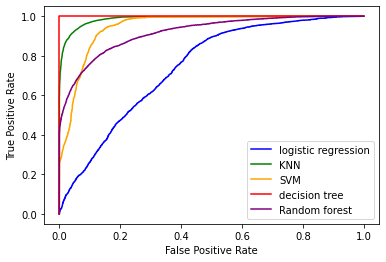

In [32]:
from sklearn.metrics import roc_curve

fpr_LR, tpr_LR, _ = roc_curve(y_test,  y_prob_LR[:,1])
fpr_KN, tpr_KN, _ = roc_curve(y_test,  y_prob_KN[:,1])
fpr_SVM, tpr_SVM, _ = roc_curve(y_test,  y_prob_SVM[:,1])
fpr_DT, tpr_DT, _ = roc_curve(y_test,  y_prob_DT)
fpr_RF, tpr_RF, _ = roc_curve(test_labels,predictions)

#import matplotlib.patches as mpatches

#blue_patch = mpatches.Patch(color='blue', label='The blue data')
#green_patch = mpatches.Patch(color='red', label='The red data')
#orange_patch = mpatches.Patch(color='red', label='The red data')
#red_patch = mpatches.Patch(color='red', label='The red data')

#plt.legend(handles=[red_patch, blue_patch])

#create ROC curve
pLR = plt.plot(fpr_LR,tpr_LR, color = 'blue', label='logistic regression')
pKN = plt.plot(fpr_KN,tpr_KN, color = 'green', label='KNN')
pSVM = plt.plot(fpr_SVM,tpr_SVM, color = 'orange', label='SVM')
pDT = plt.plot(fpr_DT,tpr_DT, color = 'red', label='decision tree')
pRF = plt.plot(fpr_RF,tpr_RF, color = 'purple', label='Random forest')
labels = ['logistic regression', 'KNN','SVM', 'decision tree', 'Random forest']
plt.legend(labels)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Text(0.5, 0, 'Feature Importances (%)')

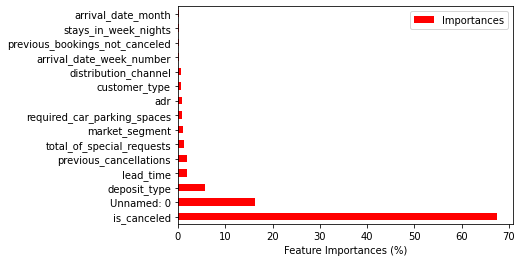

In [23]:
randomf = RandomForestClassifier()
rf_model1 = randomf.fit(X_train, y_train)

pd.DataFrame(data = rf_model1.feature_importances_*100,
                   columns = ["Importances"],
                   index = X_train.columns).sort_values("Importances", ascending = False)[:15].plot(kind = "barh", color = "r")

plt.xlabel("Feature Importances (%)")